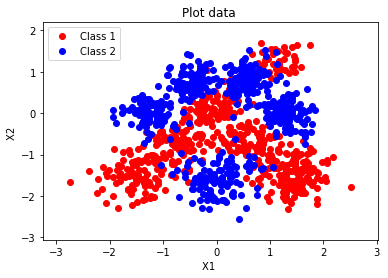

In [1]:
import numpy as np
from DataPlot import *
%matplotlib inline

X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')

# Question c; visualize the dataset; 
plot_data(X, y)

In [2]:
yin = y.reshape(1000, 1)
Xin = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)


#Question d; split the dataset into training and test sets
indices=np.random.permutation(X.shape[0])
train_id, test_id = indices[:800], indices[800:]
X_train, X_test = Xin[train_id, :], Xin[test_id, :]
y_train, y_test = yin[train_id], yin[test_id]

In [54]:
#Question e; define functions for training

def sigmoid(weights, X):
    return 1.0 / (1 + np.exp(-np.dot(X, weights)))

def gradAscent(dataset, label, weights, learnRate):
    s = sigmoid(weights, dataset)
    gradient = np.dot(dataset.T, np.subtract(label, s))
    weights = weights + learnRate * gradient
    return weights


def train(dataset, label, learnRate, iterations):
    weights = np.ones((3, 1)) # initial weights
    record = np.zeros((iterations,3))
    for i in range(iterations):
        weights = gradAscent(dataset, label, weights, learnRate)
        record[i] = weights.T
    return weights, record

def logLikelihood(dataset, label, record):
    ll = np.zeros(record.shape[0])
    for i in range(record.shape[0]):
        ll[i] = np.mean(label * np.log(sigmoid(record[i, :], dataset)) + 
                (1-label) * np.log(1 - sigmoid(record[i, :], dataset)))
    return ll

weights, record = train(X_train, y_train, 0.001, 100)

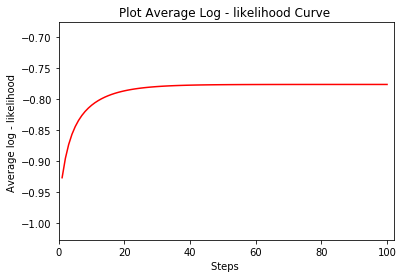

In [55]:
llTrain = logLikelihood(X_train, y_train, record)
plot_ll(llTrain)

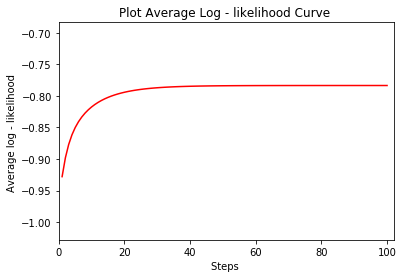

In [56]:
llTest = logLikelihood(X_test, y_test, record)
plot_ll(llTest)

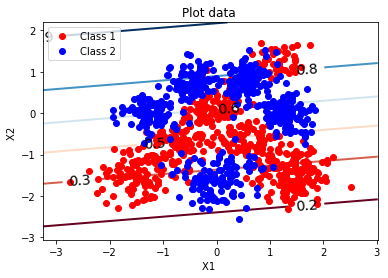

In [50]:
def predict(X, weights):
    Xaug = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    return sigmoid(weights, Xaug)

plot_predictive_distribution(X, y, predict, weights)

In [51]:
#Question f 
print('final training log-likelihood is', llTrain[-1])
print('final test log-likelihood is', llTest[-1])

final training log-likelihood is -0.776960694918
final test log-likelihood is -0.783564092803


In [53]:
def confMatrix(test, label, weights):
    prediction = sigmoid(weights, test)
    prediction[prediction > 0.5] = 1
    prediction[prediction <= 0.5] = 0
    conf = np.zeros((2,2))
    conf[0, 0] = 1 - np.count_nonzero(prediction[y_test== 0]) / prediction[y_test== 0].size
    conf[0, 1] = np.count_nonzero(prediction[y_test== 0]) / prediction[y_test== 0].size
    conf[1, 0] = 1 - np.count_nonzero(prediction[y_test== 1]) / prediction[y_test== 1].size
    conf[1, 1] = np.count_nonzero(prediction[y_test== 1]) / prediction[y_test== 1].size
    return conf

print(confMatrix(X_test, y_test, weights))

[[ 0.7254902   0.2745098 ]
 [ 0.35714286  0.64285714]]


102